## Pre Process

### Import Modules

In [81]:
#=======================================================================================================================================================================================================
from msops.CreateModel import model   as md
from   msops.Analysis.builder import opsbuild as bd
from   msops.Units.Unit import Unit
from msops.TimeSeries import ReadRecord  as rmd
from msops.Codes.Tbdy import FundemantelParameters as fm
from msops.Codes.Tbdy import Performance as pf
from msops.Material import malzememodelleri as mam
from msops.Plotter.msplotter import plotter  as ms
import os
import openseespy.opensees     as ops
import numpy                   as np
import matplotlib.pyplot       as plt
import opsvis                  as opsv
import handcalcs.render
import pandas as pd

In [82]:
if (os.path.exists("OutputImages")):
    pass
else:
    os.mkdir("OutputImages")

### Automatic Create Portal Frame Datas

In [83]:
#=======================================================================================================================================================================================================
numBay,numFloor,firstFloor,bayWidht,storyHeight=3,8,4,5,3
pf1 = md.createmodel(numBay,numFloor,firstFloor,bayWidht,storyHeight)

### Definitions

In [84]:
%%render params
HCol1 = 40*Unit.cm
BCol1 = 40*Unit.cm

HCol2 = 35*Unit.cm
BCol2 = 35*Unit.cm

HCol3 = 30*Unit.cm
BCol3 = 30*Unit.cm

HBeam1 = 60*Unit.cm
BBeam1 = 30*Unit.cm

HBeam2 = 50*Unit.cm
BBeam2 = 30*Unit.cm

HBeam3 = 40*Unit.cm
BBeam3 = 30*Unit.cm

<IPython.core.display.Latex object>

In [85]:
%%render params
fc = 20*Unit.MPa# Nominal concrete compressive strength
#Ec = Ec = 57000*(fc/Unit.MPa)**0.5 * Unit.MPa
Ec=30000000
nu = 0.2                        # Poisson's ratio
Gc = Ec/(2*(1+nu))              # Shear modulus

concdensity = 24.99 * Unit.kN/Unit.m**3   # Conc density
wBeam = (20 +  0.3*10)   # dist. load on beam

<IPython.core.display.Latex object>

In [86]:
#section properties
#==================================================================================================================
kCol =1
kBeam=1

Acol1 = HCol1*BCol1                  # Cross-sectional area of columns
Icol1 = kCol*1/12*BCol1*HCol1**3     # Effective moment of inertia of columns

Acol2 = HCol2*BCol2                  # Cross-sectional area of columns
Icol2 = kCol*1/12*BCol2*HCol2**3     # Effective moment of inertia of columns

Acol3 = HCol3*BCol3                  # Cross-sectional area of columns
Icol3 = kCol*1/12*BCol3*HCol3**3     # Effective moment of inertia of columns


Abeam1 = BBeam1*HBeam1               # Cross-sectional area of beams
Ibeam1 = kBeam*1/12*BBeam1*HBeam1**3 # Gross moment of inertia of beams

Abeam2 = BBeam2*HBeam2               # Cross-sectional area of beams
Ibeam2 = kBeam*1/12*BBeam2*HBeam2**3 # Gross moment of inertia of beams

Abeam3 = BBeam3*HBeam3               # Cross-sectional area of beams
Ibeam3 = kBeam*1/12*BBeam3*HBeam3**3 # Gross moment of inertia of beams


bardiameterbeam        = 16*Unit.mm
bardiameterexteriorcol = 18*Unit.mm
bardiameterinteriorcol = 22*Unit.mm
cover                  = 5*Unit.cm
barareabeam            = 3.14*bardiameterbeam**2/4
barareaexteriorcol     = 3.14*bardiameterexteriorcol**2/4
barareainteriorcol2    = 3.14*bardiameterinteriorcol**2/4
   
ColNumBarsTop          = 3
ColNumBarsBot          = 3
ColNumBarsInterior     = 2
   
BeamNumBarsTop         = 5
BeamNumBarsBot         = 3
BeamNumBarsInterior    = 0

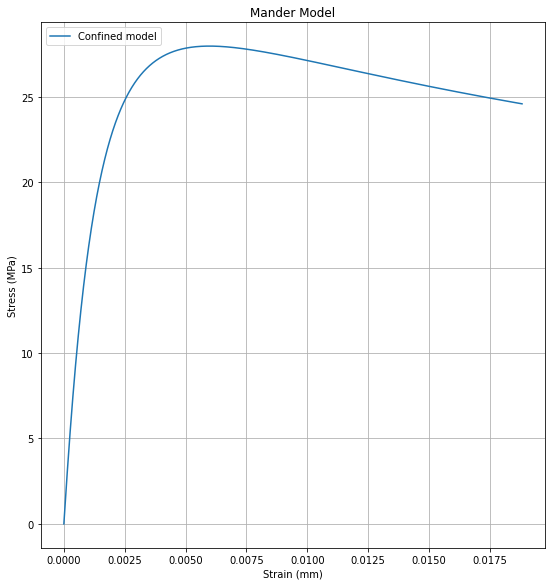

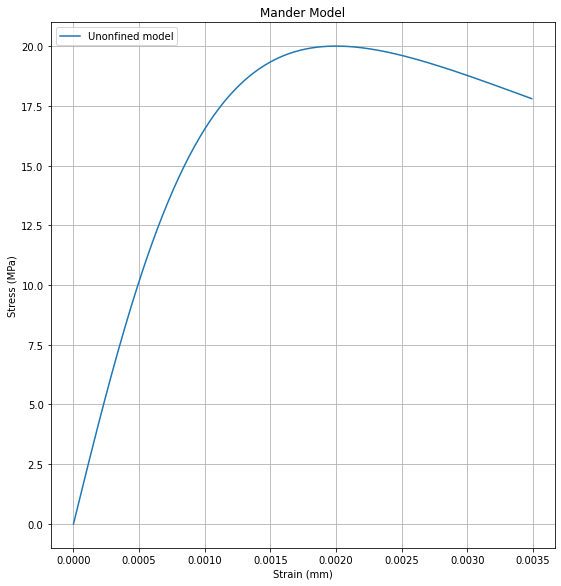

In [87]:
s=150 #mm
etriye_çapı = 10 #mm
boyuna_donatı_çapı = 22 #mm
pas_payı = 50 #mm
baslık_donatı_top = 3 #adet
baslık_donatı_bot = 3 #adet
gövde_donatı_adeti =2 #adet
x_koladeti = 3 #kesitin x eksenini kesen kol sayısı
y_koladeti = 3 #kesitin y eksenini kesen kol sayısı
unconfined,confined=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol1*10**3,HCol1*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
unconfined,confined=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol2*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
unconfined,confined=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol3*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
ms.plot_mander(confined['strain_stress'][0],confined['strain_stress'][1],label="Confined model")
ms.plot_mander(unconfined['strain_stress'][0],unconfined['strain_stress'][1],label="Unonfined model")

In [88]:
"""s=150 #mm
etriye_çapı = 10 #mm
boyuna_donatı_çapı = 22 #mm
pas_payı = 50 #mm
baslık_donatı_top = 3 #adet
baslık_donatı_bot = 3 #adet
gövde_donatı_adeti =2 #adet
x_koladeti = 3 #kesitin x eksenini kesen kol sayısı
y_koladeti = 3 #kesitin y eksenini kesen kol sayısı

interior_unconfined1,interior_confined1=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol1*10**3,HCol1*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
interior_unconfined2,interior_confined2=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol2*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
interior_unconfined3,interior_confined3=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol3*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)

exterior_unconfined1,exterior_confined1=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol1*10**3,HCol1*10**3,s,etriye_çapı,bardiameterexteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
exterior_unconfined2,exterior_confined2=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol2*10**3,HCol2*10**3,s,etriye_çapı,bardiameterexteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)
exterior_unconfined3,exterior_confined3=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol3*10**3,HCol2*10**3,s,etriye_çapı,bardiameterexteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)

ms.plot_mander(interior_confined1  ['strain_stress'][0],interior_confined1  ['strain_stress'][1],label="Interior Confined1 model ")
ms.plot_mander(interior_unconfined1['strain_stress'][0],interior_unconfined1['strain_stress'][1],label="Interior Unonfined1 model")
ms.plot_mander(exterior_confined1  ['strain_stress'][0],exterior_confined1['strain_stress'][1],label="Exterior Confined1 model ")

ms.plot_mander(interior_confined2  ['strain_stress'][0],interior_confined2['strain_stress'][1],label="Interior Confined2 model ")
ms.plot_mander(exterior_confined2  ['strain_stress'][0],exterior_confined2['strain_stress'][1],label="Exterior Confined2 model ")

ms.plot_mander(interior_confined3  ['strain_stress'][0],interior_confined3['strain_stress'][1],label="Interior Confined2 model ")
ms.plot_mander(exterior_confined3  ['strain_stress'][0],exterior_confined3  ['strain_stress'][1],label="Exterior Confined2 model ")"""

's=150 #mm\netriye_çapı = 10 #mm\nboyuna_donatı_çapı = 22 #mm\npas_payı = 50 #mm\nbaslık_donatı_top = 3 #adet\nbaslık_donatı_bot = 3 #adet\ngövde_donatı_adeti =2 #adet\nx_koladeti = 3 #kesitin x eksenini kesen kol sayısı\ny_koladeti = 3 #kesitin y eksenini kesen kol sayısı\n\ninterior_unconfined1,interior_confined1=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol1*10**3,HCol1*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)\ninterior_unconfined2,interior_confined2=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol2*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)\ninterior_unconfined3,interior_confined3=mam.tbdy_mander("B500C",fc/Unit.MPa,BCol3*10**3,HCol2*10**3,s,etriye_çapı,bardiameterinteriorcol*10**3,pas_payı,ColNumBarsTop,ColNumBarsBot,ColNumBarsInterior,x_koladeti,y_koladeti)\n\nexterior_unconfined1,exterior_confined1=mam.tbdy_man

In [89]:
%%render long
# unconfined concrete
fc1U  = -fc          # UNCONFINED concrete (todeschini parabolic model), maximum stress
eps1U =  unconfined['values'][1] #-eps_c_sargısız[f_c_sargısız.index(max(f_c_sargısız))]      # strain at maximum strength of unconfined concrete
fc2U  =  unconfined['values'][2] #-f_c_sargısız[-1]*Unit.MPa    # ultimate stress
eps2U =  unconfined['values'][3] #-eps_c_sargısız[-1]       # strain at ultimate stress

# confined concrete
fc1C  = confined['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
eps1C = confined['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
fc2C  = confined['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
eps2C = confined['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 
# tensile-strength properties
Lambda = 0.1        # ratio between unloading slope at eps2 and initial slope Ec
fct = 0.10*fc       # tensile strength +tension
Ets = fct/0.002     # tension softening stiffness

# REINFORCING STEEL
#============================================================================================================
fsy = 500*Unit.MPa;     # Yield stress
Es = 2*10**5*Unit.MPa;     # Young's modulus
bs = 0.01           # strain-hardening ratio
R0 = 18             # control the transition from elastic to plastic branches
cR1 = 0.925         # control the transition from elastic to plastic branches
cR2 = 0.15          # control the transition from elastic to plastic branches
minStrain = -0.1    # minimum steel strain in the fibers (steel buckling)
maxStrain = 0.1     # maximum steel strain in the fibers (steel rupture)

<IPython.core.display.Latex object>

In [90]:
"""%%render long
# unconfined concrete
fc1U  = -fc          # UNCONFINED concrete (todeschini parabolic model), maximum stress
eps1U =  interior_unconfined1['values'][1] #-eps_c_sargısız[f_c_sargısız.index(max(f_c_sargısız))]      # strain at maximum strength of unconfined concrete
fc2U  =  interior_unconfined1['values'][2] #-f_c_sargısız[-1]*Unit.MPa    # ultimate stress
eps2U =  interior_unconfined1['values'][3] #-eps_c_sargısız[-1]       # strain at ultimate stress

# confined concrete
# 40*40 interior and exterior column
C1ifc1C  = interior_confined1['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C1ieps1C = interior_confined1['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C1ifc2C  = interior_confined1['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C1ieps2C = interior_confined1['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 

C1efc1C  = exterior_confined1['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C1eeps1C = exterior_confined1['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C1efc2C  = exterior_confined1['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C1eeps2C = exterior_confined1['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 

# 35*35 interior and exterior column
C2ifc1C  = interior_confined2['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C2ieps1C = interior_confined2['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C2ifc2C  = interior_confined2['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C2ieps2C = interior_confined2['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 

C2efc1C  = exterior_confined2['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C2eeps1C = exterior_confined2['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C2efc2C  = exterior_confined2['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C2eeps2C = exterior_confined2['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 

# 30*30 interior and exterior column
C3ifc1C  = interior_confined3['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C3ieps1C = interior_confined3['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C3ifc2C  = interior_confined3['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C3ieps2C = interior_confined3['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 

C3efc1C  = exterior_confined3['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress
C3eeps1C = exterior_confined3['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres
C3efc2C  = exterior_confined3['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress
C3eeps2C = exterior_confined3['values'][3] #-eps_c_sargılı[-1]     # strain at ultimate stress 


# tensile-strength properties
Lambda = 0.1        # ratio between unloading slope at eps2 and initial slope Ec
fct = 0.10*fc       # tensile strength +tension
Ets = fct/0.002     # tension softening stiffness

# REINFORCING STEEL
#============================================================================================================
fsy = 500*Unit.MPa;     # Yield stress
Es = 2*10**5*Unit.MPa;     # Young's modulus
bs = 0.01           # strain-hardening ratio
R0 = 18             # control the transition from elastic to plastic branches
cR1 = 0.925         # control the transition from elastic to plastic branches
cR2 = 0.15          # control the transition from elastic to plastic branches
minStrain = -0.1    # minimum steel strain in the fibers (steel buckling)
maxStrain = 0.1     # maximum steel strain in the fibers (steel rupture)"""

"%%render long\n# unconfined concrete\nfc1U  = -fc          # UNCONFINED concrete (todeschini parabolic model), maximum stress\neps1U =  interior_unconfined1['values'][1] #-eps_c_sargısız[f_c_sargısız.index(max(f_c_sargısız))]      # strain at maximum strength of unconfined concrete\nfc2U  =  interior_unconfined1['values'][2] #-f_c_sargısız[-1]*Unit.MPa    # ultimate stress\neps2U =  interior_unconfined1['values'][3] #-eps_c_sargısız[-1]       # strain at ultimate stress\n\n# confined concrete\n# 40*40 interior and exterior column\nC1ifc1C  = interior_confined1['values'][0] #-f_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]*Unit.MPa     # CONFINED concrete (mander model), maximum stress\nC1ieps1C = interior_confined1['values'][1] #-eps_c_sargılı[f_c_sargılı.index(max(f_c_sargılı))]   # strain at maximum stres\nC1ifc2C  = interior_confined1['values'][2] #-f_c_sargılı[-1]*Unit.MPa    # ultimate stress\nC1ieps2C = interior_confined1['values'][3] #-eps_c_sargılı[-1]     # strain at ultimat

In [91]:
C4040_mass = HCol1 *BCol1 *concdensity*4/Unit.g
C3535_mass = HCol2 *BCol2 *concdensity*3/Unit.g
C3030_mass = HCol3 *BCol3 *concdensity*3/Unit.g
B3060_mass = HBeam1*BBeam1*concdensity*5/Unit.g
B3050_mass = HBeam2*BBeam2*concdensity*5/Unit.g
B3040_mass = HBeam3*BBeam3*concdensity*5/Unit.g

In [92]:
C4040_mass,C3030_mass,C3535_mass,B3040_mass,B3050_mass,B3060_mass

(1.630336391437309,
 0.6877981651376146,
 0.9361697247706424,
 1.5284403669724769,
 1.910550458715596,
 2.2926605504587156)

## Create Opensees Model

### Build Opensees Model

In [93]:
#=======================================================================================================================================================================================================

bd.modelbuild()

### Create Nodes

In [94]:
for node in pf1.node_dict.keys():
    if node in pf1.floorNodes[0]:
        ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C4040_mass/2, C4040_mass/2, 0.0)
    
    if node in pf1.floorNodes[1]:
        if node in [pf1.floorNodes[1][0],pf1.floorNodes[1][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C4040_mass+B3060_mass+C4040_mass)/2, (C4040_mass+B3060_mass+C4040_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C4040_mass+B3060_mass, C4040_mass+B3060_mass, 0.0)
            
    if node in pf1.floorNodes[2]:
        if node in [pf1.floorNodes[2][0],pf1.floorNodes[2][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3535_mass+B3050_mass+C4040_mass)/2, (C3535_mass+B3050_mass+C4040_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C4040_mass+C3535_mass)/2+B3050_mass,(C4040_mass+C3535_mass)/2+B3050_mass, 0.0)
    
    if node in pf1.floorNodes[3]:
        if node in [pf1.floorNodes[3][0],pf1.floorNodes[3][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3535_mass+B3050_mass+C3535_mass)/2,(C3535_mass+B3050_mass+C3535_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C3535_mass+B3050_mass,C3535_mass+B3050_mass, 0.0)
    
    if node in pf1.floorNodes[4]:
        if node in [pf1.floorNodes[4][0],pf1.floorNodes[4][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3535_mass+B3050_mass+C3535_mass)/2,(C3535_mass+B3050_mass+C3535_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C3535_mass+B3050_mass,C3535_mass+B3050_mass, 0.0)
    
    if node in pf1.floorNodes[5]:
        if node in [pf1.floorNodes[5][0],pf1.floorNodes[5][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3535_mass+B3040_mass+C3030_mass)/2,(C3535_mass+B3040_mass+C3030_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3535_mass+C3030_mass)/2+B3040_mass,(C3535_mass+C3030_mass)/2+B3040_mass, 0.0)
    
    if node in pf1.floorNodes[6]:
        if node in [pf1.floorNodes[6][0],pf1.floorNodes[6][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3030_mass+B3040_mass+C3030_mass)/2, (C3030_mass+B3040_mass+C3030_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C3030_mass+B3040_mass, C3030_mass+B3040_mass, 0.0)
    
    if node in pf1.floorNodes[7]:
        if node in [pf1.floorNodes[7][0],pf1.floorNodes[7][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3030_mass+B3040_mass+C3030_mass)/2, (C3030_mass+B3040_mass+C3030_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C3030_mass+B3040_mass, C3030_mass+B3040_mass, 0.0)
    
    if node in pf1.floorNodes[8]:
        if node in [pf1.floorNodes[8][0],pf1.floorNodes[8][-1]]:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',(C3030_mass+B3040_mass)/2, (C3030_mass+B3040_mass)/2, 0.0)
        else:
            ops.node(node,pf1.node_dict[node][0],pf1.node_dict[node][1],'-mass',C3030_mass/2+B3040_mass, C3030_mass/2+B3040_mass, 0.0)

#nodal_mass = bd.calcnodalmass(pf1.node_dict,pf1.column_dict,pf1.beam_dict,pf1.ColumnLength_dict,pf1.BeamLength_dict,
#                              Acol2,Abeam2,distLoadbeam=0,concDensity=concdensity)
#bd.createnodes(pf1.node_dict,nodal_mass) # Create nodes and nodal mass for modal analysis

#=======================================================================================================================================================================================================


### Fixed Nodes

In [95]:
for i in pf1.floorNodes[0]:
    ops.fix(i, 1, 1, 1)

### Create Geometric Transformations

In [96]:
#=======================================================================================================================================================================================================
#equalDOF( rNodeTag , cNodeTag , *dofs )
"""
for node in pf1.node_dict.keys():
    if node in pf1.floorNodes[1]:
        ops.equalDOF(pf1.floorNodes[1][0],pf1.floorNodes[1][1],1)
        ops.equalDOF(pf1.floorNodes[1][0],pf1.floorNodes[1][2],1)
        ops.equalDOF(pf1.floorNodes[1][0],pf1.floorNodes[1][3],1)
    if node in pf1.floorNodes[2]:
        ops.equalDOF(pf1.floorNodes[2][0],pf1.floorNodes[2][1],1)
        ops.equalDOF(pf1.floorNodes[2][0],pf1.floorNodes[2][2],1)
        ops.equalDOF(pf1.floorNodes[2][0],pf1.floorNodes[2][3],1)
    if node in pf1.floorNodes[3]:
        ops.equalDOF(pf1.floorNodes[3][0],pf1.floorNodes[3][1],1)
        ops.equalDOF(pf1.floorNodes[3][0],pf1.floorNodes[3][2],1)
        ops.equalDOF(pf1.floorNodes[3][0],pf1.floorNodes[3][3],1)
    if node in pf1.floorNodes[4]:
        ops.equalDOF(pf1.floorNodes[4][0],pf1.floorNodes[4][1],1)
        ops.equalDOF(pf1.floorNodes[4][0],pf1.floorNodes[4][2],1)
        ops.equalDOF(pf1.floorNodes[4][0],pf1.floorNodes[4][3],1)
    if node in pf1.floorNodes[5]:
        ops.equalDOF(pf1.floorNodes[5][0],pf1.floorNodes[5][1],1)
        ops.equalDOF(pf1.floorNodes[5][0],pf1.floorNodes[5][2],1)
        ops.equalDOF(pf1.floorNodes[5][0],pf1.floorNodes[5][3],1)
    if node in pf1.floorNodes[6]:
        ops.equalDOF(pf1.floorNodes[6][0],pf1.floorNodes[6][1],1)
        ops.equalDOF(pf1.floorNodes[6][0],pf1.floorNodes[6][2],1)
        ops.equalDOF(pf1.floorNodes[6][0],pf1.floorNodes[6][3],1)
    if node in pf1.floorNodes[7]:
        ops.equalDOF(pf1.floorNodes[7][0],pf1.floorNodes[7][1],1)
        ops.equalDOF(pf1.floorNodes[7][0],pf1.floorNodes[7][2],1)
        ops.equalDOF(pf1.floorNodes[7][0],pf1.floorNodes[7][3],1)
    if node in pf1.floorNodes[8]:
        ops.equalDOF(pf1.floorNodes[8][0],pf1.floorNodes[8][1],1)
        ops.equalDOF(pf1.floorNodes[8][0],pf1.floorNodes[8][2],1)
        ops.equalDOF(pf1.floorNodes[8][0],pf1.floorNodes[8][3],1)
"""
ColTransfTag = 1
BeamTransfTag = 2
ops.geomTransf('Linear', BeamTransfTag) #Beam Tranformation Tag
ops.geomTransf('PDelta', ColTransfTag)  #Column Tranformation Tag

### Define Uniaxial Material

In [97]:
fc1U, eps1U, fc2U , eps2U

(-20000.0, -0.002, -17800.05412686899, -0.0034900000000000005)

In [98]:
#=======================================================================================================================================================================================================
IDconcCover = 1 # Tag for unconfined concrete material
IDconcCore = 2 # Tag for confined concrete material
IDSteel = 3 # Tag for steel material without min-max properties
IDMinMaxSteel = 4 # Tag for steel material with min-max properties

#ops.uniaxialMaterial('Concrete02',IDconcCover, fc1U, eps1U, fc2U, eps2U, Lambda, fct, Ets) #Dış kabuk betonu malzeme tanımlaması
#ops.uniaxialMaterial('Concrete02',IDconcCore , fc1C, eps1C, fc2C , eps2C, Lambda, fct, Ets)  #Çekirdek beton malzeme tanımlaması
#ops.uniaxialMaterial('Concrete01',IDconcCover, fc1U, eps1U, fc2U , eps2U) #Dış kabuk betonu malzeme tanımlaması
#ops.uniaxialMaterial('Concrete01',IDconcCore , fc1C, eps1C, fc2C , eps2C) #Dış kabuk betonu malzeme tanımlaması
ops.uniaxialMaterial('Concrete04' ,IDconcCover, fc1U  , eps1U, eps2U,Ec, fct, Ets, Lambda)
ops.uniaxialMaterial('Concrete04' ,IDconcCore , fc1C  , eps1C, eps2C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması

ops.uniaxialMaterial('Steel02',IDSteel, fsy, Es, bs,  R0, cR1, cR2)                        #Çelik malzemesi tanımlaması
#ops.uniaxialMaterial('MinMax', IDMinMaxSteel, IDSteel, '-min', minStrain, '-max', maxStrain)#çelik malzemesi minmax içerisine atandı


In [99]:
"""#=======================================================================================================================================================================================================
IDconcCover    = 3
IDint1concCore = 4 # Tag for confined concrete material
IDint2concCore = 5 # Tag for confined concrete material
IDint3concCore = 6 # Tag for confined concrete material

IDext1concCore = 7 # Tag for confined concrete material
IDext2concCore = 8 # Tag for confined concrete material
IDext3concCore = 9 # Tag for confined concrete material

#IDconcCore = 7 # Tag for confined concrete material
IDSteel       = 10 # Tag for steel material without min-max properties
#IDMinMaxSteel = 11 # Tag for steel material with min-max properties


#ops.uniaxialMaterial('Concrete02',IDconcCover, fc1U, eps1U, fc2U, eps2U, Lambda, fct, Ets) #Dış kabuk betonu malzeme tanımlaması
#ops.uniaxialMaterial('Concrete02',IDconcCore , fc1C, eps1C, fc2C , eps2C, Lambda, fct, Ets)  #Çekirdek beton malzeme tanımlaması
#ops.uniaxialMaterial('Concrete01',IDconcCover, fc1U, eps1U, fc2U , eps2U) #Dış kabuk betonu malzeme tanımlaması
#ops.uniaxialMaterial('Concrete01',IDconcCore , fc1C, eps1C, fc2C , eps2C) #Dış kabuk betonu malzeme tanımlaması
ops.uniaxialMaterial('Concrete04' ,IDconcCover    , fc1U  , eps1U, eps2U,Ec, fct, Ets, Lambda)  #kabuk beton
ops.uniaxialMaterial('Concrete04' ,IDint1concCore , C1ifc1C  , C1ieps1C, C1ieps2C,Ec, fct, Ets, Lambda)  #kabuk beton
ops.uniaxialMaterial('Concrete04' ,IDext1concCore , C1efc1C  , C1eeps1C, C1eeps2C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması

ops.uniaxialMaterial('Concrete04' ,IDint2concCore , C2ifc1C  , C2ieps1C, C2ieps1C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması
ops.uniaxialMaterial('Concrete04' ,IDext2concCore , C2efc1C  , C2eeps1C, C2eeps2C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması

ops.uniaxialMaterial('Concrete04' ,IDint3concCore , C3ifc1C  , C3ieps1C, C3ieps1C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması
ops.uniaxialMaterial('Concrete04' ,IDext3concCore , C3efc1C  , C3eeps1C, C3eeps2C,Ec, fct, Ets, Lambda)  #Çekirdek beton malzeme tanımlaması

ops.uniaxialMaterial('Steel02',IDSteel, fsy, Es, bs,  R0, cR1, cR2)                        #Çelik malzemesi tanımlaması
#ops.uniaxialMaterial('MinMax', IDMinMaxSteel, IDSteel, '-min', minStrain, '-max', maxStrain)#çelik malzemesi minmax içerisine atandı"""


"#=======================================================================================================================================================================================================\nIDconcCover    = 3\nIDint1concCore = 4 # Tag for confined concrete material\nIDint2concCore = 5 # Tag for confined concrete material\nIDint3concCore = 6 # Tag for confined concrete material\n\nIDext1concCore = 7 # Tag for confined concrete material\nIDext2concCore = 8 # Tag for confined concrete material\nIDext3concCore = 9 # Tag for confined concrete material\n\n#IDconcCore = 7 # Tag for confined concrete material\nIDSteel       = 10 # Tag for steel material without min-max properties\n#IDMinMaxSteel = 11 # Tag for steel material with min-max properties\n\n\n#ops.uniaxialMaterial('Concrete02',IDconcCover, fc1U, eps1U, fc2U, eps2U, Lambda, fct, Ets) #Dış kabuk betonu malzeme tanımlaması\n#ops.uniaxialMaterial('Concrete02',IDconcCore , fc1C, eps1C, fc2C , eps2C, Lambda, fct, Ets)  #Çekir

### Create Fiber Sections

In [100]:
# Define sections
# ------------------------------------------------------------------------
# rectangular fiber section with one layer of steel evenly distributed around the perimeter and a confined core.
ColSecTag_Fiber1 = 12 # Tag for fiber column sections
ColSecTag_Fiber2 = 13
ColSecTag_Fiber3 = 14
ColSecTag_Fiber4 = 15 
ColSecTag_Fiber5 = 16
ColSecTag_Fiber6 = 17

#### C40*40 Exterior column fiber section 

In [101]:
fiber_sec = bd.BuildRCrectSection(ColSecTag_Fiber1, HCol1, BCol1, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareaexteriorcol ,ColNumBarsBot, barareaexteriorcol,ColNumBarsInterior, barareaexteriorcol, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber1,fiber_sec)
del fiber_sec

#### C40*40 Interior column fiber section 

In [102]:
fiber_sec2 =bd.BuildRCrectSection(ColSecTag_Fiber2, HCol1, BCol1, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareainteriorcol2 ,ColNumBarsBot, barareainteriorcol2,ColNumBarsInterior, barareainteriorcol2, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber2,fiber_sec2)
del fiber_sec2

#### C35*35 Exterior column fiber section 

In [103]:
fiber_sec3 =bd.BuildRCrectSection(ColSecTag_Fiber3, HCol2, BCol2, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareaexteriorcol ,ColNumBarsBot, barareaexteriorcol,ColNumBarsInterior, barareaexteriorcol, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber3,fiber_sec3)
del fiber_sec3

#### C35*35 Interior column fiber section 

In [104]:
fiber_sec4 =bd.BuildRCrectSection(ColSecTag_Fiber4, HCol2, BCol2, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareainteriorcol2 ,ColNumBarsBot, barareainteriorcol2,ColNumBarsInterior, barareainteriorcol2, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber4,fiber_sec4)
del fiber_sec4

#### C30*30 Exterior column fiber section 

In [105]:
fiber_sec5 =bd.BuildRCrectSection(ColSecTag_Fiber5, HCol3, BCol3, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareaexteriorcol ,ColNumBarsBot, barareaexteriorcol,ColNumBarsInterior, barareaexteriorcol, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber5,fiber_sec5)
del fiber_sec5

#### C30*30 Interior column fiber section 

In [106]:
fiber_sec6 =bd.BuildRCrectSection(ColSecTag_Fiber6, HCol3, BCol3, cover, cover, IDconcCore, IDconcCover, IDSteel,
                        ColNumBarsTop,barareainteriorcol2 ,ColNumBarsBot, barareainteriorcol2,ColNumBarsInterior, barareainteriorcol2, 
                        nfCoreY=4, nfCoreZ=4, nfCoverY=4, nfCoverZ=4, pflag=1)
#ms.plot_fiber_section(ColSecTag_Fiber6,fiber_sec6)
del fiber_sec6

### Create Beam Sections and Hinge Properties

In [107]:
ElBeamSec_Elastic  = 30       # Tag for elastic sbeam section which is located at the beam interior
ElBeamSec_Elastic2 = 31       # Tag for elastic sbeam section which is located at the beam interior
ElBeamSec_Elastic3 = 32       # Tag for elastic sbeam section which is located at the beam interior
ops.section('Elastic', ElBeamSec_Elastic , Ec, Abeam1, Ibeam1) #[P,Mz] davranışını sonuç olarak veriyor. B60/30
ops.section('Elastic', ElBeamSec_Elastic2, Ec, Abeam2, Ibeam2) #B50/30
ops.section('Elastic', ElBeamSec_Elastic3, Ec, Abeam3, Ibeam3) #B40/30

# Moment - Curvature lardan alınan akma momentleri ve akma birim şekildeğiştirmeleri girilmiştir
BeamMatTagFlex1 = 1333
MyBeam     = 40#157		# yield moment kNm
PhiYCol   = 1.02*10**-5			# yield curvature
EIBeamCrack= MyBeam/PhiYCol	    # cracked section inertia
b         = 0.01                # strain-hardening ratio (ratio between post-yield tangent and initial elastic tangent)
ops.uniaxialMaterial ('Steel01' ,BeamMatTagFlex1 ,MyBeam ,EIBeamCrack ,b) 		# bilinear behavior for flexure

print(f"MyBeam={MyBeam},PhiYCol={PhiYCol},EIBeamCrack={EIBeamCrack}, kRatio ={EIBeamCrack/Ibeam1*10**8}")

BeamMatTagFlex2 = 1334
MyBeam     = 40#127		# yield moment
PhiYCol   = 1.27*10**-5			# yield curvature
EIBeamCrack= MyBeam/PhiYCol	    # cracked section inertia
b         = 0.01                # strain-hardening ratio (ratio between post-yield tangent and initial elastic tangent)
ops.uniaxialMaterial ('Steel01' ,BeamMatTagFlex2 ,MyBeam ,EIBeamCrack ,b) 		# bilinear behavior for flexure

print(f"MyBeam={MyBeam},PhiYCol={PhiYCol},EIBeamCrack={EIBeamCrack}, kRatio ={EIBeamCrack/Ibeam2*10**8}")

BeamMatTagFlex3 = 1335
MyBeam     = 40#96		# yield moment
PhiYCol   = 1.68*10**-5			# yield curvature
EIBeamCrack= MyBeam/PhiYCol	    # cracked section inertia
b         = 0.01                # strain-hardening ratio (ratio between post-yield tangent and initial elastic tangent)
ops.uniaxialMaterial ('Steel01' ,BeamMatTagFlex3 ,MyBeam ,EIBeamCrack ,b) 		# bilinear behavior for flexure


print(f"MyBeam={MyBeam},PhiYCol={PhiYCol},EIBeamCrack={EIBeamCrack}, kRatio ={EIBeamCrack/Ibeam3*10**8}")

BeamAxialTag1 = 20
BeamAxialTag2 =21
BeamAxialTag3 =22
ops.uniaxialMaterial('Elastic',BeamAxialTag1,Ec*Abeam1)
ops.uniaxialMaterial('Elastic',BeamAxialTag2,Ec*Abeam2)
ops.uniaxialMaterial('Elastic',BeamAxialTag3,Ec*Abeam3)


BeamSecTag_agg1 = 1001
BeamSecTag_agg2 = 1002
BeamSecTag_agg3 = 1003

ops.section('Aggregator', BeamSecTag_agg1, BeamMatTagFlex1,'Mz')#Beam30*60
ops.section('Aggregator', BeamSecTag_agg2, BeamMatTagFlex2,'Mz')#Beam30*60
ops.section('Aggregator', BeamSecTag_agg3, BeamMatTagFlex3,'Mz')#Beam30*60


beamIntgrTag1 = 7
beamIntgrTag2 = 8
beamIntgrTag3 = 9
Lpl1 = 0.5* HBeam1
Lpl2 = 0.5* HBeam2
Lpl3 = 0.5* HBeam3

##Beam integration point definition
ops.beamIntegration('HingeRadau', beamIntgrTag1, BeamSecTag_agg1, Lpl1, BeamSecTag_agg1, Lpl1, ElBeamSec_Elastic)
ops.beamIntegration('HingeRadau', beamIntgrTag2, BeamSecTag_agg2, Lpl2, BeamSecTag_agg2, Lpl2, ElBeamSec_Elastic2)
ops.beamIntegration('HingeRadau', beamIntgrTag3, BeamSecTag_agg3, Lpl3, BeamSecTag_agg3, Lpl3, ElBeamSec_Elastic3)


MyBeam=40,PhiYCol=1.02e-05,EIBeamCrack=3921568.6274509802, kRatio =7.262164124909224e+16
MyBeam=40,PhiYCol=1.27e-05,EIBeamCrack=3149606.2992125982, kRatio =1.0078740157480315e+17
MyBeam=40,PhiYCol=1.6800000000000002e-05,EIBeamCrack=2380952.3809523806, kRatio =1.4880952380952374e+17


### Columns Hinge Properties

In [108]:
#=======================================================================================================================================================================================================
#Column integration points definitions
#Create elements
"""
ColMatTagFlex = 1334
MyCol     = 200		# yield moment
PhiYCol   = -eps1C			# yield curvature
EIColCrack= MyCol/PhiYCol	    # cracked section inertia
b         = 0.01                # strain-hardening ratio (ratio between post-yield tangent and initial elastic tangent)
ops.uniaxialMaterial ('Steel01' ,ColMatTagFlex ,MyCol ,EIColCrack ,b) 		# bilinear behavior for flexure

print(f"MyBeam={MyCol},PhiYCol={PhiYCol},EIBeamCrack={EIColCrack},")


ColAxialTag1 = 40
ColAxialTag2 =41
ColAxialTag3 =42
ops.uniaxialMaterial('Elastic',ColAxialTag1,Ec*Acol1)
ops.uniaxialMaterial('Elastic',ColAxialTag2,Ec*Acol2)
ops.uniaxialMaterial('Elastic',ColAxialTag3,Ec*Acol3)

ColElasticSec1,ColElasticSec2,ColElasticSec3 = 228,229,230
ops.section('Elastic',ColElasticSec1,Ec,Acol1,Icol1)
ops.section('Elastic',ColElasticSec2,Ec,Acol2,Icol2)
ops.section('Elastic',ColElasticSec3,Ec,Acol3,Icol3)

secAgg1,secAgg2,secAgg3 =231,232,233
#secAgg4,secAgg5,secAgg6,secAgg7,secAgg8,secAgg9 = 234,235,236,237,238,239


ops.section('Aggregator', secAgg1,ColAxialTag1,'P',ColMatTagFlex,'Mz' , '-section', ColElasticSec1)
ops.section('Aggregator', secAgg2,ColAxialTag2,'P',ColMatTagFlex,'Mz' , '-section', ColElasticSec2)
ops.section('Aggregator', secAgg3,ColAxialTag3,'P',ColMatTagFlex,'Mz' , '-section', ColElasticSec3)

ops.section('Aggregator', secAgg4,ColAxialTag1,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber1)
ops.section('Aggregator', secAgg5,ColAxialTag1,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber2)
ops.section('Aggregator', secAgg6,ColAxialTag2,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber3)
ops.section('Aggregator', secAgg7,ColAxialTag2,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber4)
ops.section('Aggregator', secAgg8,ColAxialTag3,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber5)
ops.section('Aggregator', secAgg9,ColAxialTag3,'P',ColMatTagFlex,'Mz' , '-section', ColSecTag_Fiber6)
"""
## Create Integration point 
colIntgrTag1 = 1
colIntgrTag2 = 2
colIntgrTag3 = 3
colIntgrTag4 = 4
colIntgrTag5 = 5
colIntgrTag6 = 6

ColElasticSec1,ColElasticSec2,ColElasticSec3 = 228,229,230
ops.section('Elastic',ColElasticSec1,Ec,Acol1,Icol1)
ops.section('Elastic',ColElasticSec2,Ec,Acol2,Icol2)
ops.section('Elastic',ColElasticSec3,Ec,Acol3,Icol3)

Lplcol4040 = 0.5*HCol1
Lplcol3535 = 0.5*HCol2
Lplcol3030 = 0.5*HCol3

ops.beamIntegration('HingeMidpoint', colIntgrTag1, ColSecTag_Fiber1, Lplcol4040, ColSecTag_Fiber1, Lplcol4040, ColElasticSec1)
ops.beamIntegration('HingeMidpoint', colIntgrTag2, ColSecTag_Fiber2, Lplcol4040, ColSecTag_Fiber2, Lplcol4040, ColElasticSec1)
ops.beamIntegration('HingeMidpoint', colIntgrTag3, ColSecTag_Fiber3, Lplcol3535, ColSecTag_Fiber3, Lplcol3535, ColElasticSec2)
ops.beamIntegration('HingeMidpoint', colIntgrTag4, ColSecTag_Fiber4, Lplcol3535, ColSecTag_Fiber4, Lplcol3535, ColElasticSec2)
ops.beamIntegration('HingeMidpoint', colIntgrTag5, ColSecTag_Fiber5, Lplcol3030, ColSecTag_Fiber5, Lplcol3030, ColElasticSec3)
ops.beamIntegration('HingeMidpoint', colIntgrTag6, ColSecTag_Fiber6, Lplcol3030, ColSecTag_Fiber6, Lplcol3030, ColElasticSec3)


#Kolonlar için entegrasyon noktaları tanımlamaları

#np=6
#ops.beamIntegration('Lobatto',colIntgrTag1,ColSecTag_Fiber1,np)
#ops.beamIntegration('Lobatto',colIntgrTag2,ColSecTag_Fiber2,np)
#ops.beamIntegration('Lobatto',colIntgrTag3,ColSecTag_Fiber3,np)
#ops.beamIntegration('Lobatto',colIntgrTag4,ColSecTag_Fiber4,np)
#ops.beamIntegration('Lobatto',colIntgrTag5,ColSecTag_Fiber5,np)
#ops.beamIntegration('Lobatto',colIntgrTag6,ColSecTag_Fiber6,np)


### Create Column Elements

In [109]:
#element forceBeamColumn $eleTag $iNode $jNode $transfTag "HingeRadau $secTagI $LpI $secTagJ $LpJ $secTagInterior" 
np=5
for colId in pf1.column_dict.keys():
    jNode = pf1.node_dict[pf1.column_dict[colId][1]][1]
    if jNode == 4. or jNode == 7.:
        if colId == max(pf1.floorNodes.keys()) or colId == min(pf1.floorNodes.keys()):
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag1)
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber1,ColTransfTag)
        else:
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag2 )
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber2,ColTransfTag)
    if jNode ==10. or jNode == 13. or jNode ==16.:
        if colId == max(pf1.floorNodes.keys()) or colId == min(pf1.floorNodes.keys()):
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag3 )
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber3,ColTransfTag)
        else:
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag4 )
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber4,ColTransfTag)
        
    if jNode ==19. or jNode ==22. or jNode == 25.:
        if colId == max(pf1.floorNodes.keys()) or colId == min(pf1.floorNodes.keys()):
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag5 )
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber5,ColTransfTag)
        
        else:
            ops.element('forceBeamColumn'    , colId , pf1.column_dict[colId][0], pf1.column_dict[colId][1],ColTransfTag,  colIntgrTag6 )
            #ops.element('nonlinearBeamColumn', colId, pf1.column_dict[colId][0], pf1.column_dict[colId][1], np, ColSecTag_Fiber6,ColTransfTag)
        

### Create Beam Elements

In [110]:
for beamId in pf1.beam_dict.keys():
    jNode = pf1.beam_dict[beamId][1]
    if jNode in pf1.floorNodes[1]:
        ops.element('forceBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],BeamTransfTag,beamIntgrTag1,'-mass', wBeam/Unit.g)
        #                                                                                            np, BeamSecTag      ,BeamTransfTag
        #ops.element('nonlinearBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],np,ElBeamSec_Elastic,BeamTransfTag,'-mass', wBeam/Unit.g)
        continue
    if jNode in pf1.floorNodes[2] or pf1.floorNodes[3] or pf1.floorNodes[4]:
        ops.element('forceBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],BeamTransfTag,beamIntgrTag2,'-mass', wBeam/Unit.g)
        #ops.element('nonlinearBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],np,ElBeamSec_Elastic,BeamTransfTag,'-mass', wBeam/Unit.g)
        continue
    else:
        ops.element('forceBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],BeamTransfTag,beamIntgrTag3,'-mass', wBeam/Unit.g)
        #ops.element('nonlinearBeamColumn',beamId, pf1.beam_dict[beamId][0], pf1.beam_dict[beamId][1],np,ElBeamSec_Elastic,BeamTransfTag,'-mass', wBeam/Unit.g)
        continue

### Define distribution load on beam

In [111]:
# Create a Plain load pattern with a Linear TimeSeries
# ------------------------------------------------------------------------
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
for idBeam in pf1.beam_dict.keys():
    ops.eleLoad('-ele', idBeam, '-type', '-beamUniform', -wBeam, 0)

T, Mratios, Mfactors, Mtots = bd.modal_analys2(8)


************************************************************ 
Extracting the mass matrix, ignore the warnings...
Using genBandArpack as solver...
Eigenvalue analysis is completed.
Modal Periods and Frequencies
Mode| T [sec]|    f [Hz]| ω [rad/sec]|λ [rad²/sec²]
   1|  1.1171|     0.895|        5.62|       31.64
   2|  0.4133|     2.419|       15.20|      231.09
   3|  0.2421|     4.131|       25.96|      673.69
   4|  0.1778|     5.623|       35.33|     1248.23
   5|  0.1350|     7.406|       46.53|     2165.44
   6|  0.1162|     8.609|       54.09|     2926.22
   7|  0.1089|     9.181|       57.69|     3327.77
   8|  0.0940|    10.636|       66.83|     4466.06
Total Activated Masses
      M₁|      M₂|      M₃
  353.03|  353.03|    0.00
Modal Mass Participation Factors
Mode|     Γ₁|     Γ₂|     Γ₃
   1| 16.922|  0.000|  0.000
   2| -6.673|  0.000|  0.000
   3| -3.855| -0.001|  0.000
   4|  2.041| -0.002|  0.000
   5|  1.273|  0.005|  0.000
   6| -0.722|  0.017|  0.000
   7| -0.001|-15

WARNING analysis Transient - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Transient - no Integrator specified, 
 TransientIntegrator default will be used
WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0
OpenSees > analyze failed, returned: -3 error flag


### Gravity Analysis and Plot Beam

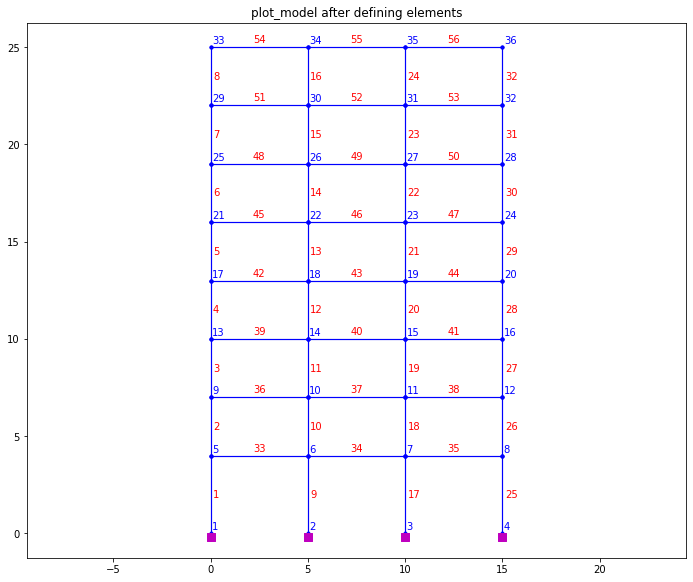

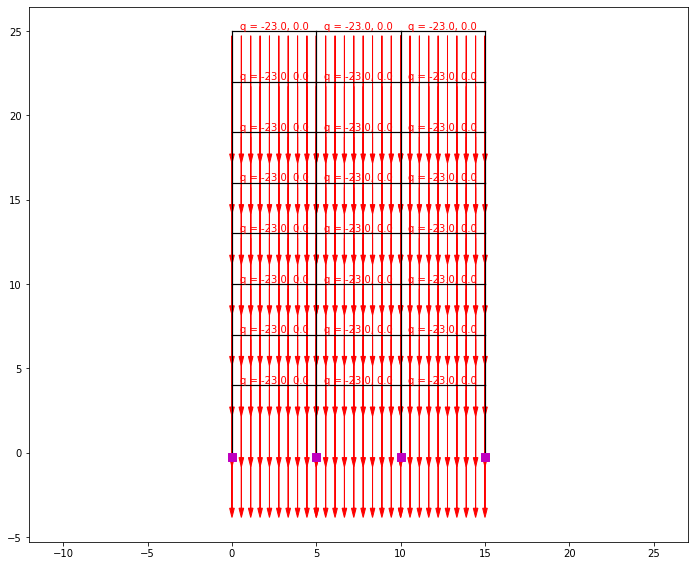

In [112]:
#======================================================================================================
eleForces_grav, nodalDisps_grav, BaseReactions_grav,eleSection_grav = bd.do_gravity()
ms.plot_model()
#del eleForces_grav, nodalDisps_grav, BaseReactions_grav,eleSection_grav 

#Set lateral load pattern with a Linear TimeSeries
ops.pattern('Plain', 2, 1)
for key in pf1.floorNodes.keys():
    if key != 0 or key!=5:
        for node in pf1.floorNodes[key]:
            ops.load(node, 1, 0.0, 0.0)
    else:
        for node in pf1.floorNodes[key]:
            ops.load(node, 2, 0.0, 0.0)

LoadFactor, DispCtrlNode=bd.do_nspa(dmax=4, ctrlNode=36, ctrlDOF=1, nSteps=500,tol = 0.02,iterMax = 300,pFlag = 0,nType = 2)
ms.capacityCurve(DispCtrlNode,LoadFactor)

### Create TimeSeries

Fundamental period, T = 1.3556400023616342 sec
 mass damping coefficient 0.4553 stiffness damping coefficient 0.0004 betaKcurr = 0.0 betaKinit = 0.0


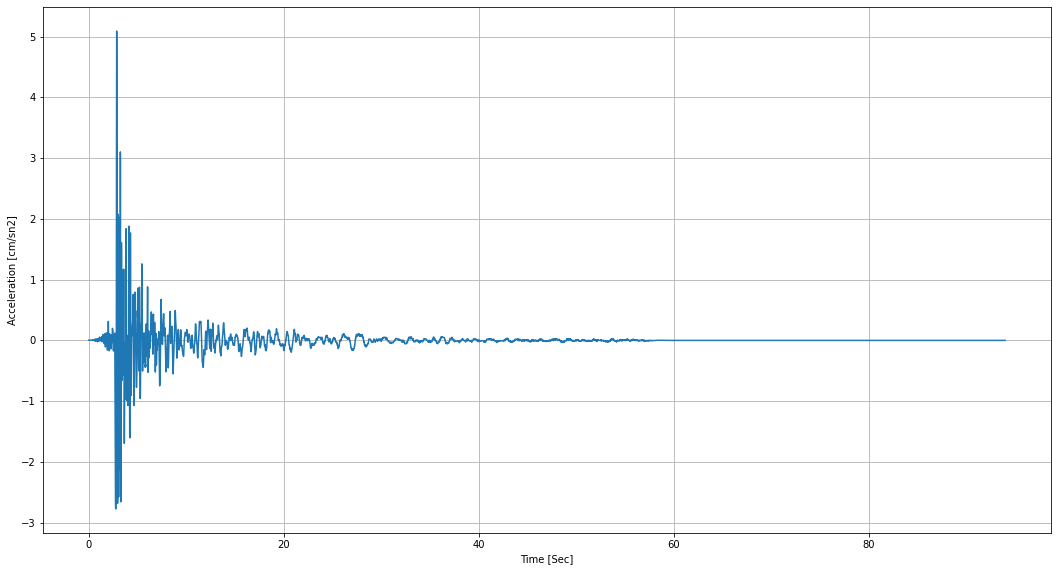

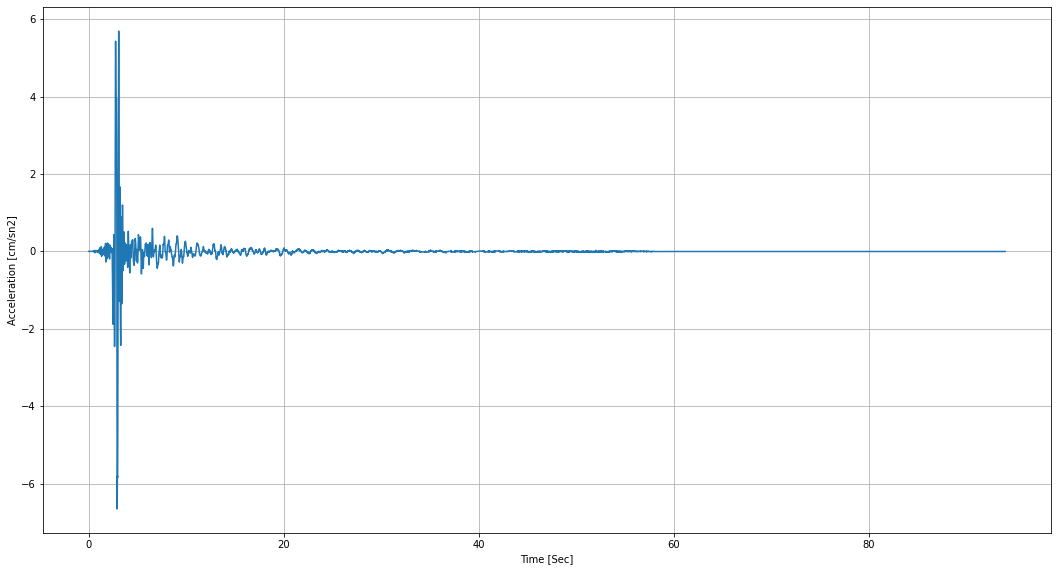

In [113]:
#===========================================================================================================================================
bd.rayleigh(numMode=8,xDamp = 0.05,betaKcurr = 0.0,betaKinit = 0.0)
#===========================================================================================================================================
eventname="Earthquakes/Coalinga"
eventlist = [i for i in os.listdir(f"./{eventname}") if i.endswith('.AT2')] #verilen deprem kayıtlarının bulunduğu klasördeki .AT2 uzantılı dosyaların listelenmesi
filePath = f"./{eventname}/{eventlist[0]}"
filePath2 = f"./{eventname}/{eventlist[1]}"

timegap = rmd.calc_timegap(60,0.05,1.48)
time,acceleration,npts,dt     = rmd.ReadRecord(filePath,timegap,g=9.81,plot=1)
time2,acceleration2,npts2,dt2 = rmd.ReadRecord(filePath2,timegap,g=9.81,plot=1)
del acceleration,acceleration2,npts,npts2,time,time2,timegap
#============================================================================================================================================

GMFile ="./Earthquakes/Coalinga/RSN406.acc"
#*0.2729
GMdirection=1
GMfact=1
tsTag=3
IDloadTag=400
GMfatt = Unit.g
#ops.timeSeries('Path', tsTag, '-dt', dt, '-values', *acceleration, '-factor', GMfatt) # time series object
#ops.pattern('UniformExcitation', IDloadTag,GMdirection, '-accel', tsTag)# pattern object
ops.timeSeries('Path', tsTag, '-dt', dt, '-filePath', GMFile, '-factor', GMfatt) # time series object
ops.pattern('UniformExcitation', IDloadTag,GMdirection, '-accel', tsTag,'-factor',GMfact)# pattern object

## Run Analysis

### Run Time History Anaysis

In [114]:
DtAnalysis   = dt
TmaxAnalysis = 5

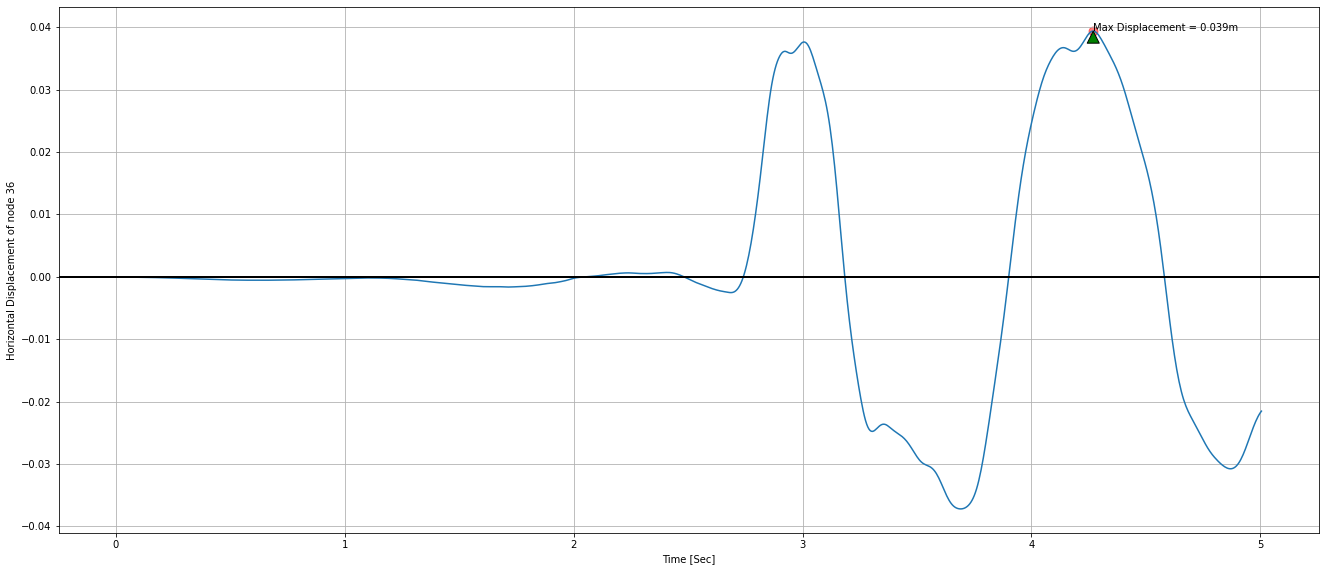

In [115]:
ops.wipeAnalysis()

bd.analysis_define(solver=0,Tol=1e-8,maxNumIter=300,pFlag=0,nType=2)
top_nodal_disp,eleForces,times,sectionStrainStress,Eds,sectionOutput,nodalOutput,fiberData =bd.run_timehistory( DtAnalysis   =DtAnalysis,
                                                                                                      TmaxAnalysis =TmaxAnalysis,
                                                                                                      outEleForces =False,
                                                                                                      outNodalDisp =True,
                                                                                                      outFiber     =[True, 0.30, cover, IDconcCover, IDconcCore, IDSteel,Lplcol3030],
                                                                                                      animotions   =False,
                                                                                                      outSection   =True)
ms.top_disp_plot(top_nodal_disp,times,dt)
#del confined,Mratios,Mtots,Mfactors,T,unconfined,Eds,eleForces

In [116]:
T1, Mratios, Mfactors, Mtots = bd.modal_analys2(3)                                                                   
ops.loadConst('-time', 0.0)


************************************************************ 
Extracting the mass matrix, ignore the warnings...
Using genBandArpack as solver...
Eigenvalue analysis is completed.
Modal Periods and Frequencies
Mode| T [sec]|    f [Hz]| ω [rad/sec]|λ [rad²/sec²]
   1|  1.2001|     0.833|        5.24|       27.41
   2|  0.4489|     2.228|       14.00|      195.91
   3|  0.2636|     3.794|       23.84|      568.34
Total Activated Masses
      M₁|      M₂|      M₃
  353.03|  353.03|    0.00
Modal Mass Participation Factors
Mode|     Γ₁|     Γ₂|     Γ₃
   1| 16.918| -0.078|  0.000
   2|  6.715| -0.017|  0.000
   3| -3.855| -0.077|  0.000
Effective Modal Mass Participation Ratios [%]
Mode|     U₁|     U₂|     U₃
   1| 81.073|  0.002|  0.000
   2| 12.774|  0.000|  0.000
   3|  4.209|  0.002|  0.000
Cumulative Effective Modal Mass Participation Ratios [%]
Mode|    ∑U₁|    ∑U₂|    ∑U₃
   1| 81.073|  0.002|  0.000
   2| 93.847|  0.002|  0.000
   3| 98.057|  0.004|  0.000


WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 2
WARNING Linear::solveCurrentStep() -the LinearSOE failed in solve()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 5.005
OpenSees > analyze failed, returned: -3 error flag


## Check Results

### Story Drift Check

In [117]:
fmp = fm(columndict=pf1.column_dict,nodalOutput=nodalOutput)

In [118]:
fmp.drift.head(2)

,xDrift,yDrift,xDriftmax,yDriftmax,Length,xStoryDrift,xStoryDriftCheck,yStoryDrift,yStoryDriftCheck
1,"[-1.6012599330069746e-05, -1.6132393883695344e...","[-0.00037935531419899717, -0.00037935561049621...",0.012014,0.000155,4.0,0.003003,0.003 < 0.008 ✓,0.000039,4e-05 < 0.008 ✓
2,"[2.2300660271960418e-05, 2.2298339652894246e-0...","[-0.0002489732335585286, -0.000248973116426009...",0.008072,0.000135,3.0,0.002691,0.00269 < 0.008 ✓,0.000045,4e-05 < 0.008 ✓


In [119]:
pf1.floorFrames[(pf1.floorFrames.EleType == "Column")&(pf1.floorFrames.Floor == 1)]

,EleId,EleType,Floor
1,1,Column,1
9,9,Column,1
17,17,Column,1
25,25,Column,1


### Sections Perform Level TBDY 2018

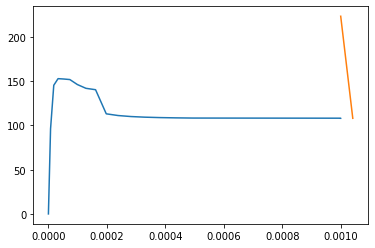

In [120]:
Moment    = [0,96.2304 ,145.4056 ,152.8694 ,152.4919 ,151.8506,146.237  ,141.9567 ,140.3721 ,113.1239 ,111.1968 ,110.0526 ,109.3373 ,108.8713 ,108.5569 ,108.3384 ,108.1826,108.069]
Curvature = [0,7.33E-06,1.832E-05,3.298E-05,5.131E-05,7.33E-05,9.895E-05,1.283E-04,1.613E-04,1.979E-04,2.382E-04,2.822E-04,3.298E-04,3.811E-04,4.361E-04,4.948E-04,0.001   ,0.001  ]
plt.plot(Curvature,Moment)
plt.plot( [0.001041320000000002,0.001, ],[108.069, 223.4056],)
from scipy import integrate as intg
alan = round(intg.trapezoid(Moment,Curvature),4)
a = intg.cumtrapz(Moment,Curvature)
#plt.plot(a)
alan,a

def idealization_area(node1,node2):
    b = node1[0]-0.
    h = node1[1]-0.
    b2 = node2[0]-node1[0]
    h2 = node2[1]-node1[1]
    area1 = b*h/2
    area2 = ((h+h2)/2)*b2
    area = area1+area2
    return area

def iter_area(node1,node2):
    real_area  = intg.trapezoid(Moment,Curvature)
    ideal_area = idealization_area(node1,node2)
    error = 1-(ideal_area/real_area)
    if error <= 0.01:
        return [node1,node2]
    else:
        while error <= 0.01:
            node1[0] = node1[0] + 1
            node1[1] = node1[1] + 1.0E-05
            ideal_area = idealization_area(node1,node2)
            error = 1-(ideal_area/real_area)
            if error <= 0.01:
                return [node1,node2]
            else:
                if node1[0] == node2[0]/2 or node1[1] == node2[1]*1.5:
                    return("Bulunamadı")
                continue
    return error
node1 = [1.132E-05,120.4056]
node2 = [0.001,108.069]
        

        
    

In [121]:
prf = pf(eps_su = 0.08,h=HCol1*10**3,bw=BCol1*10**3,
         s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterexteriorcol,
                                                numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                x_koladeti=x_koladeti,y_koladeti=y_koladeti,
                                                ultimate_curvature=0.01,yield_curvature=0.002,Lp=Lpl1,Ls=Lpl1)

In [122]:
prf.steelstrain_Perform_Level,prf.concstrain_Perform_Level,prf.rotation_Perform_Level

([0.032, 0.024, 0.0075],
 [0.01288863192205295, 0.009666473941539713, 0.0025],
 [0.000801296, 0.000600972, 0])

In [123]:
frame_Level = pd.DataFrame(columns=["EleId","eps_CP","eps_LS","eps_IO","epc_CP","epc_LS","epc_IO","rot_CP","rot_LS","rot_IO"],index=[i for i in range(1,len(ops.getEleTags())+1)])
for steel,(conc,rot) in zip(prf.steelstrain_Perform_Level,zip(prf.concstrain_Perform_Level,prf.rotation_Perform_Level )):
    print(steel,conc,rot)
    for ele in ops.getEleTags():
        pass
frame_Level

0.032 0.01288863192205295 0.000801296
0.024 0.009666473941539713 0.000600972
0.0075 0.0025 0


,EleId,eps_CP,eps_LS,eps_IO,epc_CP,epc_LS,epc_IO,rot_CP,rot_LS,rot_IO
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
sectionStrainStress.head(5)

,top_cover,top_core,bot_cover,bot_core,steel_top,steel_bot
1,"{'stress': [-2681.248776802396, -2681.29435255...","{'stress': [-2212.1900590830346, -2212.0767117...","{'stress': [-2451.0778342000954, -2451.0400180...","{'stress': [-2827.963700385955, -2828.07651933...","{'stress': [-17419.926774383035, -17419.960156...","{'stress': [-17419.926774383035, -17419.960156..."
2,"{'stress': [-2695.158120777915, -2695.14438674...","{'stress': [-1052.8398765020613, -1052.8737443...","{'stress': [-1834.2805716812015, -1834.2923056...","{'stress': [-3362.321095335102, -3362.28461744...","{'stress': [-15340.674859053735, -15340.669265...","{'stress': [-15340.674859053735, -15340.669265..."
3,"{'stress': [-2887.0379071685347, -2887.0392767...","{'stress': [-1225.299963396319, -1225.29481493...","{'stress': [-2007.527131800061, -2007.52503206...","{'stress': [-3543.1289873153405, -3543.1329823...","{'stress': [-16608.491919276217, -16608.489739...","{'stress': [-16608.491919276217, -16608.489739..."
4,"{'stress': [-2586.4762552700627, -2586.4759280...","{'stress': [-552.6870763178232, -552.687211838...","{'stress': [-1504.5985130563233, -1504.5984346...","{'stress': [-3414.7952034580308, -3414.7946622...","{'stress': [-13835.838549270735, -13835.837196...","{'stress': [-13835.838549270735, -13835.837196..."
5,"{'stress': [-2208.8143262991935, -2208.8144394...","{'stress': [-35.43207621778858, -35.4319514661...","{'stress': [-1050.1073854338395, -1050.1073725...","{'stress': [-3113.9934745191526, -3113.9936817...","{'stress': [-10985.666414602847, -10985.666762...","{'stress': [-10985.666414602847, -10985.666762..."


In [126]:
steel_Performs_Level = pf.steelstrain_Perform_Level(eps_su=0.08)

#C40*40 interior and exterior column concrete performance level 
Col1exterior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol1*10**3,bw=BCol1*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterexteriorcol,
                                                numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                x_koladeti=x_koladeti,y_koladeti=y_koladeti)
Col1interior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol1*10**3,bw=BCol1*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterinteriorcol,
                                                numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                x_koladeti=x_koladeti,y_koladeti=y_koladeti)

#C35*35 interior and exterior column concrete performance level
Col2exterior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol2*10**3,bw=BCol2*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                        pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterexteriorcol,
                                                        numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                        x_koladeti=x_koladeti,y_koladeti=y_koladeti)
Col2interior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol2*10**3,bw=BCol2*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterinteriorcol,
                                                numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                x_koladeti=x_koladeti,y_koladeti=y_koladeti)

#C30*30 interior and exterior column concrete performance level 
Col3exterior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol3*10**3,bw=BCol3*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                        pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterexteriorcol,
                                                        numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                      x_koladeti=x_koladeti,y_koladeti=y_koladeti)
Col3interior_conc_Performs_Level  = mam.concstrain_Perform_Level(h=HCol3*10**3,bw=BCol3*10**3,s=150,f_sy=500,f_co=fc/Unit.MPa,
                                                pas_payı=pas_payı,etriye_çapı=10,boyuna_donatı_çapı=bardiameterinteriorcol,
                                                numBarsTop=baslık_donatı_top,numBarsBot=baslık_donatı_bot,gövde_donatı_adeti=gövde_donatı_adeti,
                                                x_koladeti=x_koladeti,y_koladeti=y_koladeti)

Col1_TopSteel_performs = mam.steelstrain_Perform_Level(eps_su=0.08)
Col1_TopSteel_performs


AttributeError: type object 'Performance' has no attribute 'steelstrain_Perform_Level'

In [ ]:
""" 
BİRİM ŞEKİLDEĞİŞTİRMELER İÇİN 
                    0 => Göçme  ;
                    1 => Göçmenin önlenmesi ;
                    2 => Kontrollü hasar ;
                    3 => Sınırlı hasar
DÖNMELER İÇİN 
                    0 => Göçme  ;
                    1 => Göçmenin önlenmesi ;
                    2 => Kontrollü hasar ;
                    3 => Sınırlı hasar
KESİT İÇİN 
            0 => Göçme Bölgesi
            1 => İleri Hasar bölgesi
            2 => Belirgin hasar bölgesi
            3 => Sınırlı hasar bölgesi
"""
performance = pd.DataFrame(columns=["TopCoverConcPerform","TopSteelPerform","TopCoreConcPerform",
                                    "BotCoreConcPerform","BotCoverConcPerform","BotSteelPerform",
                                    "iRotationPerform","jRotationPerform","SectionPerform"],index=[i for i in range(1,len(ops.getEleTags())+1)])

Col1exterior_rotation_perform =mam.rotation_Perform_Level(ultimate_curvature=0.01,yield_curvature=0.002,Lp=Lpl1,Ls=Lpl1,db=bardiameterexteriorcol)
print(Col1exterior_rotation_perform)


for ele in ops.getEleTags():
    # Top cover conc performance only one fiber from given location 
    for strain in sectionStrainStress["top_cover"][ele]["strain"]:
        if strain > Col1exterior_conc_Performs_Level[0]:
            #print("Göçme")
            performance["TopCoverConcPerform"][ele]=["Collapse"]
        if strain < Col1exterior_conc_Performs_Level[0] and strain > Col1exterior_conc_Performs_Level[1]:
            performance["TopCoverConcPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1exterior_conc_Performs_Level[1] and strain > Col1exterior_conc_Performs_Level[2]:
            performance["TopCoverConcPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1exterior_conc_Performs_Level[2]:
            performance["TopCoverConcPerform"][ele]=["Sınırlı hasar"]
    
    # Top steel performance
    for strain in sectionStrainStress["steel_top"][ele]["strain"]:
        if strain > Col1_TopSteel_performs[0]:
            #print("Göçme")
            performance["TopSteelPerform"][ele]=["Collapse"]
        if strain < Col1_TopSteel_performs[0] and strain > Col1_TopSteel_performs[1]:
            performance["TopSteelPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1_TopSteel_performs[1] and strain > Col1_TopSteel_performs[2]:
            performance["TopSteelPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1_TopSteel_performs[2]:
            performance["TopSteelPerform"][ele]=["Sınırlı hasar"]
    
    # Top cover conc performance only one fiber from given location 
    for strain in sectionStrainStress["top_core"][ele]["strain"]:
        if strain > Col1exterior_conc_Performs_Level[0]:
            #print("Göçme")
            performance["TopCoreConcPerform"][ele]=["Collapse"]
        if strain < Col1exterior_conc_Performs_Level[0] and strain > Col1exterior_conc_Performs_Level[1]:
            performance["TopCoreConcPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1exterior_conc_Performs_Level[1] and strain > Col1exterior_conc_Performs_Level[2]:
            performance["TopCoreConcPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1exterior_conc_Performs_Level[2]:
            performance["TopCoreConcPerform"][ele]=["Sınırlı hasar"]
    
    # Top steel performance
    for strain in sectionStrainStress["bot_core"][ele]["strain"]:
        if strain > Col1_TopSteel_performs[0]:
            #print("Göçme")
            performance["BotCoreConcPerform"][ele]=["Collapse"]
        if strain < Col1_TopSteel_performs[0] and strain > Col1_TopSteel_performs[1]:
            performance["BotCoreConcPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1_TopSteel_performs[1] and strain > Col1_TopSteel_performs[2]:
            performance["BotCoreConcPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1_TopSteel_performs[2]:
            performance["BotCoreConcPerform"][ele]=["Sınırlı hasar"]
    
    # Top cover conc performance only one fiber from given location 
    for strain in sectionStrainStress["bot_cover"][ele]["strain"]:
        if strain > Col1exterior_conc_Performs_Level[0]:
            #print("Göçme")
            performance["BotCoverConcPerform"][ele]=["Collapse"]
        if strain < Col1exterior_conc_Performs_Level[0] and strain > Col1exterior_conc_Performs_Level[1]:
            performance["BotCoverConcPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1exterior_conc_Performs_Level[1] and strain > Col1exterior_conc_Performs_Level[2]:
            performance["BotCoverConcPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1exterior_conc_Performs_Level[2]:
            performance["BotCoverConcPerform"][ele]=["Sınırlı hasar"]
    
    # Top steel performance
    for strain in sectionStrainStress["steel_bot"][ele]["strain"]:
        if strain > Col1_TopSteel_performs[0]:
            #print("Göçme")
            performance["BotSteelPerform"][ele]=["Collapse"]
        if strain < Col1_TopSteel_performs[0] and strain > Col1_TopSteel_performs[1]:
            performance["BotSteelPerform"][ele]=["Before Collapse"]
            
            #print("Göçmenin önlenmesi")
        if strain < Col1_TopSteel_performs[1] and strain > Col1_TopSteel_performs[2]:
            performance["BotSteelPerform"][ele]=["Kontrollü hasar"]
            
            #print("Kontrollü hasar")
        if strain < Col1_TopSteel_performs[2]:
            performance["BotSteelPerform"][ele]=["Sınırlı hasar"]
            
    for rotationi,rotationj in zip(sectionOutput["itotalRot"][ele],sectionOutput["jtotalRot"][ele]):
        if rotationi > Col1exterior_rotation_perform[0]:
            #print("Göçme")
            performance["iRotationPerform"][ele]=["Collapse"]
        if rotationi < Col1exterior_rotation_perform[0] and rotationi > Col1exterior_rotation_perform[1]:
            performance["iRotationPerform"][ele]=["Before Collapse"]
            #print("Göçmenin önlenmesi")
        if rotationi < Col1exterior_rotation_perform[1] and rotationi > Col1exterior_rotation_perform[2]:
            performance["iRotationPerform"][ele]=["Life Safety"]
            #print("Kontrollü hasar")
        if rotationi < Col1exterior_rotation_perform[2]:
            performance["iRotationPerform"][ele]=["Immediate Occupuancy"]
            
        if rotationj > Col1exterior_rotation_perform[0]:
            #print("Göçme")
            performance["jRotationPerform"][ele]=["Collapse"]
        if rotationj < Col1exterior_rotation_perform[0] and rotationj > Col1exterior_rotation_perform[1]:
            performance["jRotationPerform"][ele]=["Before Collapse"]
            #print("Göçmenin önlenmesi")
        if rotationj < Col1exterior_rotation_perform[1] and rotationj > Col1exterior_rotation_perform[2]:
            performance["jRotationPerform"][ele]=["Life Safety"]
            #print("Kontrollü hasar")
        if rotationj < Col1exterior_rotation_perform[2]:
            performance["jRotationPerform"][ele]=["Immediate Occupuancy"]
            #print("Sınırlı hasar")


## Plot Outputs

### Plotting Fiber Stress-Strain Graphs

In [ ]:
sectionStrainStress.head(2)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["top_cover"],count=4)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["top_core"],count=4)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["bot_cover"],count=4)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["bot_core"],count=4)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["steel_top"],count=4)

In [ ]:
ms.plot_StressStrain(sectionStrainStress["steel_bot"],count=4)

### Plotting Frame Moment-Curvature

In [ ]:
sectionOutput.head(2)

In [ ]:
ms.plot_Rotation(sectionOutput["itotalRot"],sectionOutput["iplasticRot"],sectionOutput["ielasticRot"])

In [ ]:
ms.plot_MomRot(sectionOutput["itotalRot"],sectionOutput["ibasicForce"],sectionOutput["jtotalRot"],sectionOutput["jbasicForce"],count=56)

In [ ]:
ms.plot_MomRot(sectionOutput["iplasticRot"],sectionOutput["ibasicForce"],sectionOutput["jplasticRot"],sectionOutput["jbasicForce"])

In [ ]:
ms.plot_MomRot(sectionOutput["ielasticRot"],sectionOutput["ibasicForce"],sectionOutput["jelasticRot"],sectionOutput["jbasicForce"])

### Energy Calculation And Plotting The Outputs

In [ ]:
plt.plot(sectionOutput["ibasicForce"][2],sectionOutput["itotalRot"][2])

In [ ]:
adet = 0
for count,(x,y) in enumerate(zip(sectionOutput["ibasicForce"][2],sectionOutput["itotalRot"][2])):
    if x<0 and y>0:
        print(f"index :{count} ; force : {x} ; rotation {y}")
        adet += 1
        continue
    if x>0 and y<0:
        print(f"index :{count} ; force : {x} ; rotation {y}")
        adet += 1
        continue
adet

In [ ]:
from scipy.integrate import cumtrapz
EH_i_total   = cumtrapz(sectionOutput["ibasicForce"][2],sectionOutput["itotalRot"][2])
#EH_j_total   = cumtrapz(sectionOutput["jbasicForce"][2],sectionOutput["jtotalRot"][2])
plt.plot(EH_i_total),plt.legend("inode")
print(EH_i_total[2395::2405])

print(EH_i_total)

In [ ]:
ms.plot_Energy(sectionOutput["ibasicForce"],sectionOutput["jbasicForce"],
                sectionOutput["itotalRot"],sectionOutput["iplasticRot"],sectionOutput["ielasticRot"],
                sectionOutput["jtotalRot"],sectionOutput["jplasticRot"],sectionOutput["jelasticRot"],count=5)

In [ ]:
sectionOutput.head(2)

In [ ]:
ms.plot_Rotation(sectionOutput["itotalRot"],sectionOutput["iplasticRot"],sectionOutput["ielasticRot"])

In [ ]:
ms.plot_MomRot(sectionOutput["itotalRot"],sectionOutput["ibasicForce"],sectionOutput["jtotalRot"],sectionOutput["jbasicForce"])

In [ ]:
ms.plot_MomRot(sectionOutput["iplasticRot"],sectionOutput["ibasicForce"],sectionOutput["jplasticRot"],sectionOutput["jbasicForce"])

In [ ]:
ms.plot_MomRot(sectionOutput["ielasticRot"],sectionOutput["ibasicForce"],sectionOutput["jelasticRot"],sectionOutput["jbasicForce"])

In [ ]:
ms.plot_Energy(sectionOutput["ibasicForce"],sectionOutput["jbasicForce"],
                sectionOutput["itotalRot"],sectionOutput["iplasticRot"],sectionOutput["ielasticRot"],
                sectionOutput["jtotalRot"],sectionOutput["jplasticRot"],sectionOutput["jelasticRot"],count=56)

for ele in ops.getEleTags():
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(25,10))
    ax.grid()
    ax.plot(sectionOutput[ele]["section_rotations_i"],sectionOutput[ele]["section_moments_i"])
    ax.legend()
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.set(xlabel=f"Rotation of {ele} in i joint", ylabel=f"Moment of {ele} in i joint",title=f"All elements (Only integration Tag 2)")
    plt.show()

## Second Time-History Analysis

### Create Aftershock

In [ ]:
#=======================================================================================================================================================================================================
GMFile ="./Coalinga/RSN418.acc"
GMdirection=1
GMfact=1*0.2729
tsTag=4
IDloadTag=401
GMfatt = Unit.g
#ops.timeSeries('Path', tsTag, '-dt', dt, '-values', *acceleration, '-factor', GMfatt) # time series object
#ops.pattern('UniformExcitation', IDloadTag,GMdirection, '-accel', tsTag)# pattern object
ops.timeSeries('Path', tsTag, '-dt', dt, '-filePath', GMFile, '-factor', GMfatt) # time series object
ops.pattern('UniformExcitation', IDloadTag,GMdirection, '-accel', tsTag,'-factor',GMfact)# pattern object


### Run Time History Analysis

In [ ]:
ops.wipeAnalysis()

bd.analysis_define()

top_nodal_disp2,eleForces2,time2,sectionStrainStress2,Eds2,sectionOutputs2,nodalOutput =bd.run_timehistory(DtAnalysis=dt2,
                                                                                                            TmaxAnalysis=70,
                                                                                                            outEleForces=True,
                                                                                                            outNodalDisp=True,
                                                                                                            outFiber=[False, 0.3, 0.05, IDconcCover, IDconcCore, IDMinMaxSteel],
                                                                                                            animotions=False,
                                                                                                            outSection=True,
                                                                                                            )

ops.loadConst('-time', 0.0)

In [ ]:
ms.top_disp_plot(top_nodal_disp2,time2,dt2)
T1, Mratios, Mfactors, Mtots = bd.modal_analys2(3)

In [ ]:

concat_disp =[i for i in top_nodal_disp[36]]
for i in top_nodal_disp2[36]:
    concat_disp.append(i)
concat_time = [i*dt for i in range(len(concat_disp))]

%matplotlib inline
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(25,10))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.grid()
ax.plot(concat_time,concat_disp,linewidth=2)
ax.axhline(0, color='black', lw=2)
ax.set(xlabel="Time [Sec]", ylabel=f"Horizontal Displacement of node {max(ops.getNodeTags())}",title=f"{eventname} main-after shock top disp/time")
plt.show()

In [ ]:
for ele in ops.getEleTags():
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(25,10))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.grid()
    ax.plot(sectionOutputs2[ele]['itotalRot'],sectionOutputs2[ele]['ibasicForce'],label="iNode")
    ax.plot(sectionOutputs2[ele]['jtotalRot'],sectionOutputs2[ele]['jbasicForce'],label="jNode")
    ax.legend()
    ax.set(xlabel="Rotation (rad)", ylabel=f"Moment",title=f"inode Of {ele} Element from Moment-Rotation")
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0,color='black',lw=2)
    plt.show()

In [ ]:
import pandas as pd
outputs = pd.DataFrame(sectionOutput).T

In [ ]:
outputs.to_pickle("./dummy.pkl")

In [ ]:
for ele in ops.getEleTags():
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(25,10))
    ax.grid()
    ax.plot(sectionOutputs2[ele]["section_rotations_i"])
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.set(xlabel=f"Rotation of step ", ylabel=f"Rotation of {ele} in i joint",title=f"Step-Rotation All Elements (Only integration Tag 1)")
    plt.show()

In [ ]:
for ele in ops.getEleTags():
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(25,10))
    ax.grid()
    ax.plot(sectionOutputs2[ele]["section_rotations_i"],sectionOutputs2[ele]["section_moments_i"])
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.set(xlabel=f"Rotation of {ele} in i joint", ylabel=f"Moment of {ele} in i joint",title=f"Moment-Rotation All Elements (Only integration Tag 1)")
    plt.show()